# MDI343 Data Challenge
### Nicolas Gallay
##### In the past few years, Face Recognition (FR) systems have reached extremely high levels of performance, paving the way to a broader range of applications, where the reliability levels were previously prohibitive to consider automation. This is mainly due to the adoption of deep learning techniques in computer vision. The most adopted paradigm consists in training a network which, from a given image , extracts a feature vector z1 which synthetizes the relevant caracteristics of image. The recognition phase then consists, from two images im1,im2, to predict wether they correspond to the same identity or not. This is done from the extracted features z1,z2.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import discriminant_analysis
from scipy.spatial import distance

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

In [225]:
def metric(y_test, y_pred):
    CM = confusion_matrix(y_test, y_pred)
    TN, TP = CM[0, 0], CM[1, 1]
    FP, FN = CM[0, 1], CM[1, 0]
    metric = (1 - (FP / (FP + TN) + FN / (FN + TP))) * 100
    return metric

In [226]:
def print_score(df):
    print(f'Mean Train sscore {df.train_score.mean()}')
    print(f'Mean Test sscore {df.test_score.mean()}')
    df


In [227]:
def def_Standarscaler(data):
    # define min max scaler
    scaler = StandardScaler()
    scaled = pd.DataFrame(scaler.fit_transform(data))
    return scaled , scaler

In [228]:
def performance(y_test, y_pred, model,X_test):
    CM = confusion_matrix(y_test, y_pred)
    TN, TP = CM[0, 0], CM[1, 1]
    FP, FN = CM[0, 1], CM[1, 0]
    print('Confusion Matrix: \n {}'.format(CM))
    print('Accuracy: {}'.format((TP + TN) / (TP + TN + FP + FN)))  
    print('False Positive Rate: {}'.format(FP / (FP + TN)))  
    print('False Negative Rate: {}'.format(FN / (FN + TP)))
    print('FPR + FNR = {}'.format(FP / (FP + TN) + FN / (FN + TP)))
    print(f'1-(FPR + FNR) = {(1 - (FP / (FP + TN) + FN / (FN + TP))) * 100}')
    plt.figure(figsize=(6,4))
    plt.grid()
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve( y_test, y_prob, pos_label=1)
    idx = np.argmin(fpr + (1-tpr))
    plt.plot(fpr, 1-tpr, label='RF')
    plt.plot(fpr[idx], (1-tpr)[idx], '+', color='k')
    plt.legend(loc='best')
    plt.xlabel('FPR')
    plt.ylabel('FNR')
    plt.show()

In [229]:
def file_submission(name,model,X_eval = pd.DataFrame(np.load(r"../Data/Data_Challenge_02_2022/test_data.npy"))):
    # Load test data
    #X_eval = pd.DataFrame(np.load(r"Data/Data_Challenge_02_2022/test_data.npy"))
    # Classify the provided test data
    y_eval = model.predict(X_eval).astype(np.int8)
    np.savetxt(f'../Submit/y_test_{name}.txt', y_eval, fmt='%i' , delimiter=',')

In [230]:
y = pd.read_csv(r"/Users/nicolasgallay/Library/CloudStorage/OneDrive-Personnel/Telecom-Paris/Python-Telecom-Paris/MDI343/Data_Challenge/Data/Data_Challenge_02_2022/train_labels.txt", names =['labels'])
y_df = y.copy()
X = pd.DataFrame(np.load(r"/Users/nicolasgallay/Library/CloudStorage/OneDrive-Personnel/Telecom-Paris/Python-Telecom-Paris/MDI343/Data_Challenge/Data/Data_Challenge_02_2022/train_data.npy"))
y = y.values.flatten()

# Objectif:   
L'objectif de ce data challenge et de prédire si les deux vecteurs Z1 et Z2 correspondent à la même image ou non. Ces deux vecteurs correspondent à aux features extraitent de chaque image.   
Les 48 colonnes de Z1 correspondent donc aux mêmes features que les 48 colonnes de Z2.

# Benchmark

In [231]:
log_reg_params = [{}]
dec_tree_params = [{}]
rand_for_params = [{}]
kneighbors_params = [{}]
naive_bayes_params = [{}]
xgboost_param =[{}]
catboost_param =[{"logging_level":"Silent"}]
lgbm_param =[{}]

In [232]:
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["XGBoost", XGBClassifier, xgboost_param],
    ["LGBM", lgb.LGBMClassifier, lgbm_param],
    ["CatBoost", CatBoostClassifier, catboost_param]
]

In [233]:
insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = metric(model.predict(X_valid), y_valid)
        insights.append((modelname, model, params, score))
insights.sort(key=lambda x:x[-1], reverse=True)

[21:05:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [234]:
for modelname, model, params, score in insights:
    print(modelname, params, score)

CatBoost {'logging_level': 'Silent'} 61.503587472440046
XGBoost {} 60.70403906142268
LGBM {} 59.302863823361264
random forest {} 58.093076832197845
log regression {} 47.60122614663291
k neighbors {} 44.02795860181672
decision tree {} 38.99691051021763
naive bayes {} 29.0404845705718


Au vu du benchmark, on voit clairement que les modèles de type  "gradient boosting" donnent de bon résultats. Nous allons donc partir sur ces trois modèles et les agréger avec un "voting classifier"

# Data Exploration

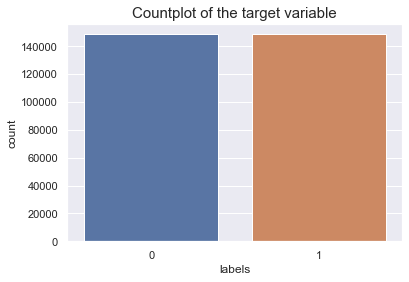

In [235]:
plt.figure(figsize = (6, 4))
sns.set_theme(style="darkgrid")
sns.countplot(x="labels", data=y_df)
plt.title("Countplot of the target variable", size = 15)
plt.show()

Les deux classes ne sont pas déséquilibrées.

In [236]:
X_delta =  X.diff(axis = 1, periods = 48)
X_delta = X_delta.iloc[:,48:]
columns = []
for i in range(0,48,1):
    columns.append(f'delta_{i}')
X_delta.columns = columns
print(X_delta.shape)
X_delta.head()

(297232, 48)


,delta_0,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9,...,delta_38,delta_39,delta_40,delta_41,delta_42,delta_43,delta_44,delta_45,delta_46,delta_47
0,2.222,0.000,0.000,0.000,28.456,-6.591,-6.324,2.770,0.0,0.00,...,0.022000,-0.081000,0.309000,-0.040000,-0.003000,0.028000,0.0,-0.518000,0.0,0.0
1,-120.880,0.000,0.000,0.000,4.550,25.100,2.250,1.760,0.0,-0.12,...,-0.280537,-0.010672,-0.004403,-0.246058,0.075407,-0.042886,0.0,-0.086350,0.0,0.0
2,56.310,0.000,0.000,0.000,3.530,-9.440,0.500,0.880,0.0,0.91,...,-0.349251,-0.377551,0.168149,-0.379767,-0.070528,-0.128141,0.0,0.426555,1.0,0.0
3,7.635,0.716,0.000,-0.716,-74.238,10.148,9.930,-14.846,0.0,0.00,...,0.336000,0.008000,-0.054000,0.039000,0.001000,0.046000,0.0,-2.047000,0.0,0.0
4,48.213,-0.138,0.138,0.000,-6.159,10.660,-0.115,-8.764,0.0,0.00,...,0.092000,-0.036000,0.018000,0.043000,-0.015000,0.112000,0.0,-1.591000,0.0,0.0


Les graphiques ci dessus correspondent aux histogrammes de la difference des deux vecteurs en fonction de du label.
La différence entre les deux vecteurs Z1 et Z2 montre qu'il est difficile de séparer les images identiques des différentes en se basant seulement sur cette différence.
Il faut donc créer de nouvelles features permettant de séparer au maximum les deux classes.

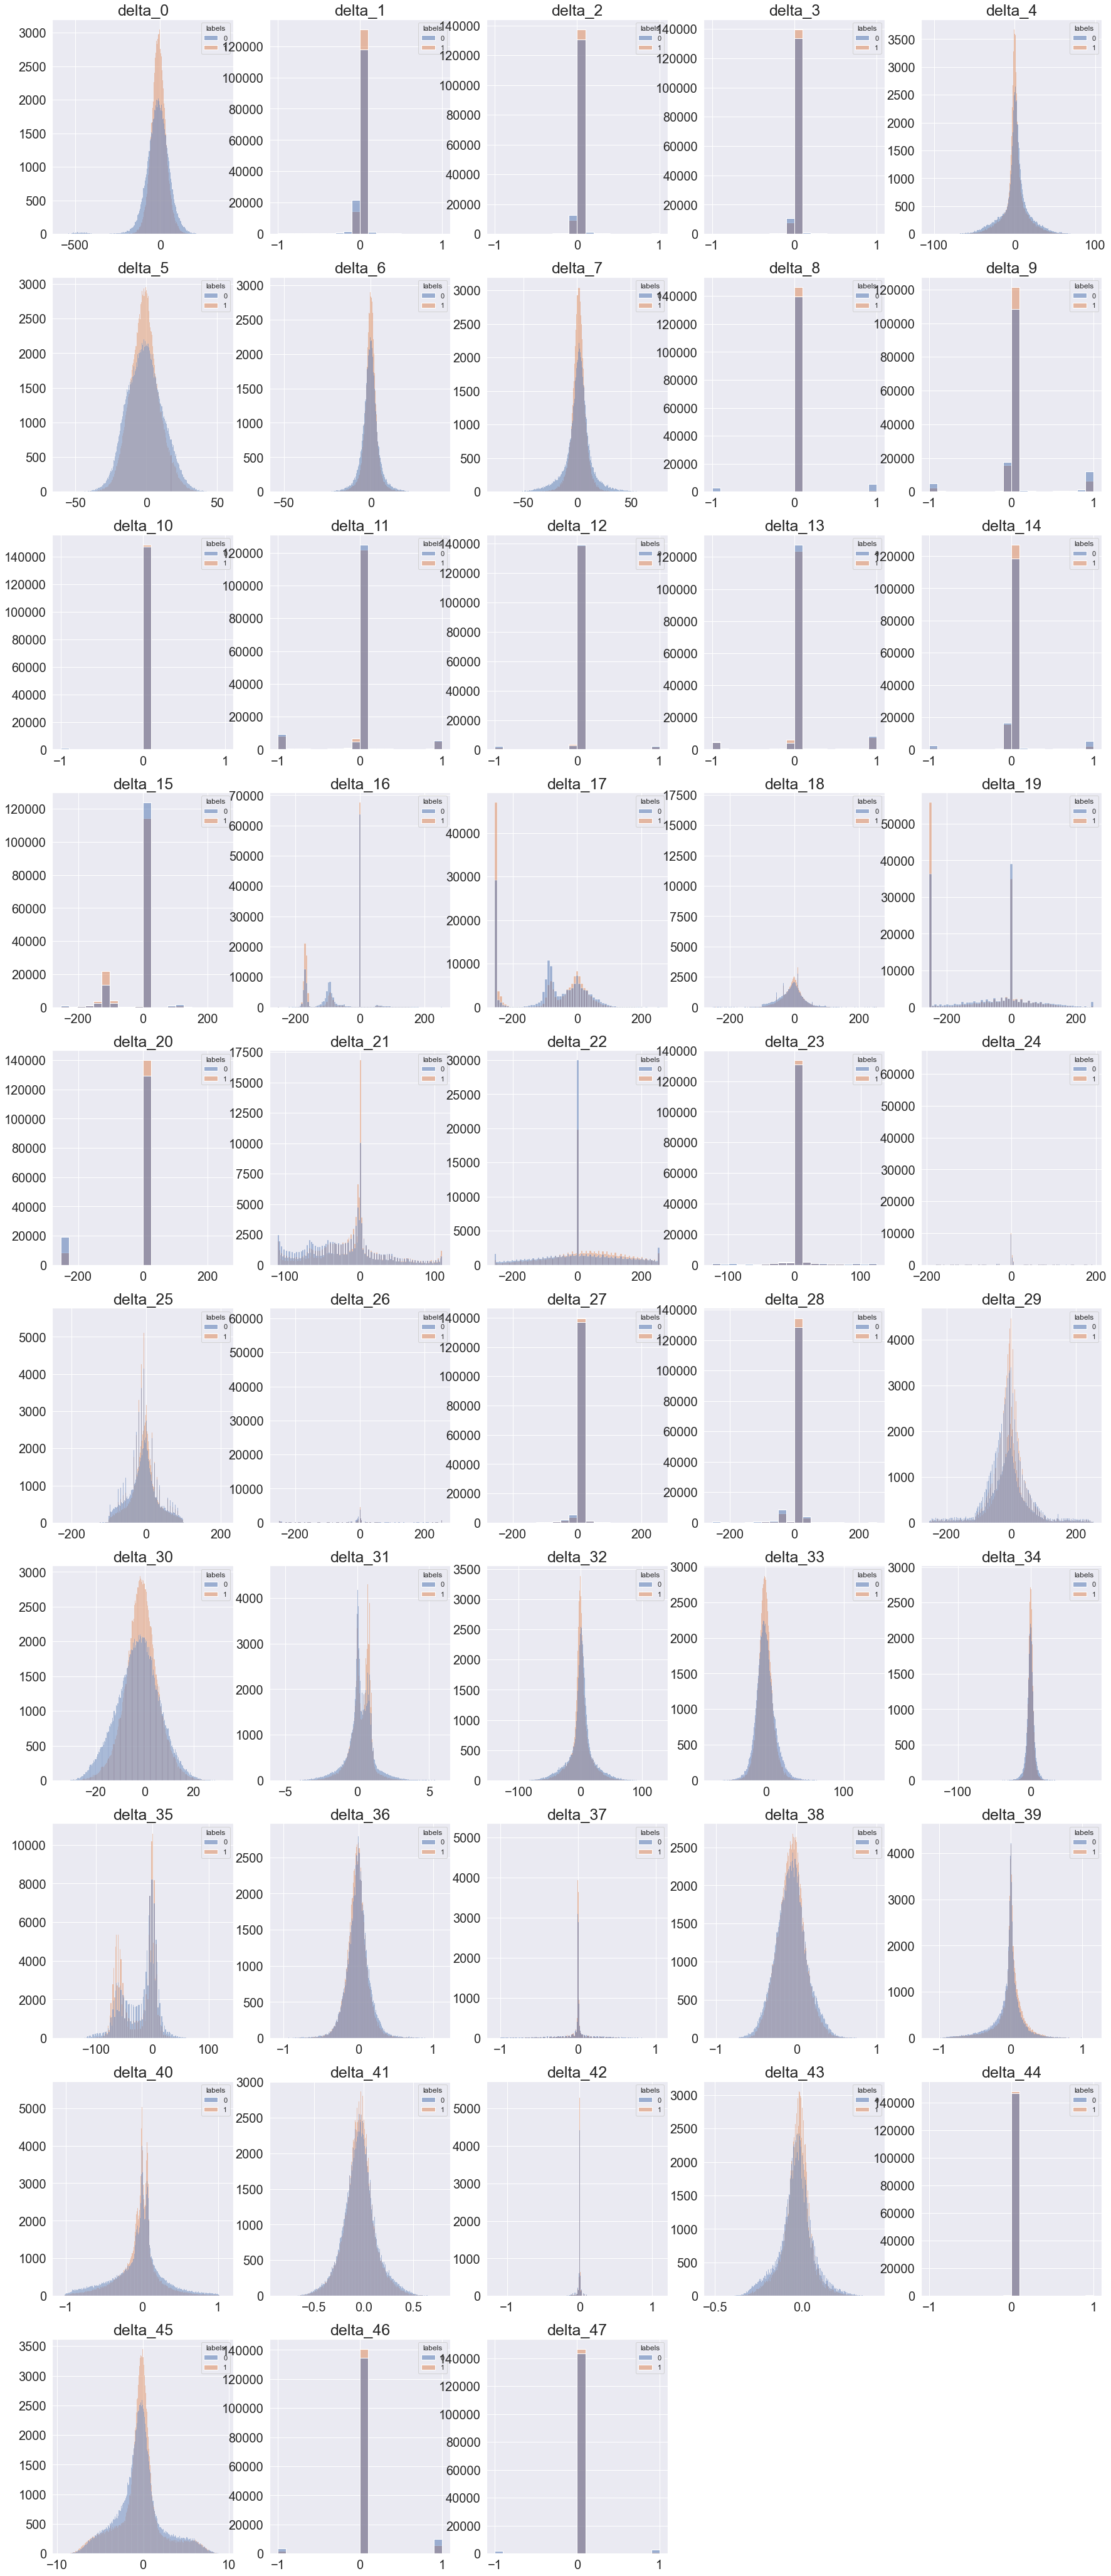

In [255]:
rows= 20
columns=5
_ = plt.figure(figsize=(30,150))
for i,cols in enumerate(X_delta.columns.tolist()):
        ax=plt.subplot(rows,columns,i+1)
        _ = sns.histplot(x=X_delta[cols],kde=False, hue = y_df['labels'])
        _ = ax.set_title(cols,fontsize=25)
        _ = ax.set_xlabel('')
        _ = ax.set_ylabel('')
        _ = ax.tick_params(labelsize=20)

_ = plt.show()

# Standardisation

In [239]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

In [240]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,164.934,0.943,0.057,0.0,-11.440,2.302,1.289,21.259,0.0,0.001,...,0.836000,0.987000,0.710000,0.406000,0.995000,0.802000,0.0,-2.010000,0.0,0.0
1,184.230,1.000,0.000,0.0,-0.260,-4.960,1.600,24.030,0.0,0.000,...,0.830774,0.922322,1.000219,0.572706,0.991272,0.878533,0.0,3.618564,0.0,0.0
2,84.793,1.000,0.000,0.0,-4.775,-6.513,-0.481,42.877,1.0,0.967,...,0.421000,0.990000,0.905000,0.874000,0.990000,0.790000,0.0,2.414000,0.0,0.0
3,195.170,1.000,0.000,0.0,3.190,-11.040,-1.780,24.310,0.0,0.000,...,0.585733,0.950675,0.937547,0.464939,0.984608,0.818712,0.0,0.095144,0.0,0.0
4,171.070,1.000,0.000,0.0,-2.640,-9.240,0.470,17.520,0.0,0.000,...,0.797221,0.980698,0.985091,0.736162,0.995728,0.908956,0.0,2.642632,0.0,0.0


In [241]:
#need to standardize beacause of the differents scale
X_standar_train , scaler = def_Standarscaler(X_train)
X_standar_valid = pd.DataFrame(scaler.transform(X_valid))

In [242]:
X_standar_train.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.116458,-0.801209,1.172902,-0.088624,-1.057494,0.858329,0.495600,-0.941107,-0.961549,-0.258270,...,0.698703,0.633344,-0.390276,-0.592743,0.278433,-0.093612,-0.062222,-1.142758,-0.296509,-0.12744
1,0.267975,0.132201,-0.100726,-0.088624,-0.008732,-0.010295,0.603511,-0.754567,-0.961549,-0.262556,...,0.664453,0.281544,0.820305,0.175096,0.223798,0.948524,-0.062222,1.160233,-0.296509,-0.12744
2,-1.713100,0.132201,-0.100726,-0.088624,-0.432271,-0.196052,-0.118556,0.514192,1.041424,3.882218,...,-2.021136,0.649662,0.423121,1.562840,0.205156,-0.257013,-0.062222,0.667372,-0.296509,-0.12744
3,0.485931,0.132201,-0.100726,-0.088624,0.314902,-0.737537,-0.569284,-0.735717,-0.961549,-0.262556,...,-0.941504,0.435763,0.558884,-0.321273,0.126134,0.133952,-0.062222,-0.281415,-0.296509,-0.12744
4,0.005789,0.132201,-0.100726,-0.088624,-0.231993,-0.522235,0.211423,-1.192812,-0.961549,-0.262556,...,0.444552,0.599066,0.757202,0.927965,0.289102,1.362788,-0.062222,0.760919,-0.296509,-0.12744


# Data Processing 


Afin d'ajouter des information permettant de prédire le miieux possible nos labels nous allons ajouter:   
- la difference entre Z1 et Z2
- l'addition entre Z1 et Z2
- Différentes distances('braycurtis', 'cityblock', 'chebyshev', 'correlation', 'euclidean', 'cosine', 'canberra', 'minkowski', 'sqeuclidean','braycurtis','canberra','chebyshev','cityblock','correlation','minkowski','sqeuclidean')
- LDA sur les vecteurs de base Z1 et Z2

In [243]:
def data_process(X, lda = False):

    # Calcul des distances 
    Z1 = X.iloc[:,0:int(X.shape[1]/2)].to_numpy()
    Z2 = X.iloc[:,int(X.shape[1]/2):].to_numpy()
    ditance_type = [distance.braycurtis,distance.cityblock,distance.chebyshev, distance.correlation,distance.euclidean,distance.cosine,distance.canberra,distance.minkowski,distance.sqeuclidean]
    ditance_name = ['braycurtis', 'cityblock', 'chebyshev', 'correlation', 'euclidean', 'cosine', 'canberra', 'minkowski', 'sqeuclidean']

    X_distance = pd.DataFrame()
    for idx, type in enumerate(ditance_type):
        dist = []
        for i in range(0,X.shape[0],1):
            dist.append(type(Z1[i], Z2[i]))
        df = pd.DataFrame(dist, columns=[f'{ditance_name[idx]}'])
        X_distance[f'{ditance_name[idx]}'] = df
    print(X_distance.shape)

    #Calcul différence entre les deux vecteurs 
    X_diff =  X.diff(axis = 1, periods = 48)
    X_diff = X_diff.iloc[:,int(X.shape[1]/2):]
    columns = []
    for i in range(0,int(X.shape[1]/2),1):
        columns.append(f'delta_neg_{i}')
    X_diff.columns = columns
    print(X_diff.shape)

    #calcul de l'addition des vecteurs
    X_add = pd.DataFrame()
    for i in range(0,int(X.shape[1]/2)):
        somme =  pd.DataFrame(X[i] + X[i + int(X.shape[1]/2)], columns=[f'delta_pos_{i}'])
        X_add = pd.concat([X_add, somme], axis=1)
    print(X_add.shape)

    #Calcul de la lda afin de séparer nos classes
    X_lda = pd.DataFrame(lda.transform(X), columns = ['lda'])

    X_final= pd.DataFrame()
    X_final = pd.concat([X,X_diff,X_add,X_distance,X_lda], axis=1,join="inner")

    return X_final

# X Train Data Engineering

In [244]:
lda_Xtrain = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
lda_Xtrain.fit(X_standar_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [245]:
X_process = data_process(X_standar_train,lda_Xtrain)
X_process.head()

(237785, 9)
(237785, 48)
(237785, 48)


,0,1,2,3,4,5,6,7,8,9,...,braycurtis,cityblock,chebyshev,correlation,euclidean,cosine,canberra,minkowski,sqeuclidean,lda
0,-0.116458,-0.801209,1.172902,-0.088624,-1.057494,0.858329,0.495600,-0.941107,-0.961549,-0.258270,...,0.445791,24.276953,3.193816,0.463169,5.634999,0.449149,18.999902,5.634999,31.753219,-0.185888
1,0.267975,0.132201,-0.100726,-0.088624,-0.008732,-0.010295,0.603511,-0.754567,-0.961549,-0.262556,...,0.522797,21.644073,2.510984,0.646108,5.297090,0.644543,20.373410,5.297090,28.059161,0.578771
2,-1.713100,0.132201,-0.100726,-0.088624,-0.432271,-0.196052,-0.118556,0.514192,1.041424,3.882218,...,0.606547,40.375367,7.549097,0.571605,10.652731,0.570778,25.839387,10.652731,113.480677,-0.895108
3,0.485931,0.132201,-0.100726,-0.088624,0.314902,-0.737537,-0.569284,-0.735717,-0.961549,-0.262556,...,1.014214,33.056052,3.331201,1.193377,7.490376,1.202943,24.124505,7.490376,56.105735,-1.650476
4,0.005789,0.132201,-0.100726,-0.088624,-0.231993,-0.522235,0.211423,-1.192812,-0.961549,-0.262556,...,0.772929,30.384973,2.822619,0.975400,6.987184,1.002594,22.261470,6.987184,48.820742,0.246880


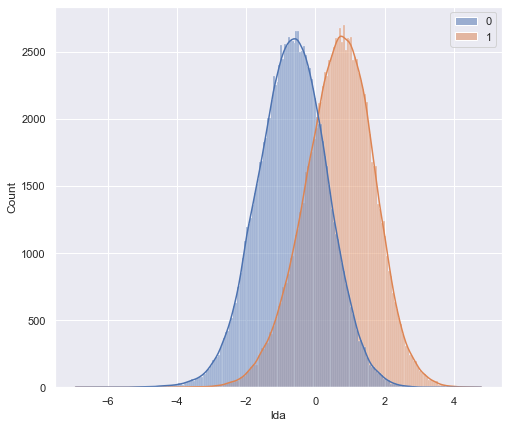

In [246]:
_ = plt.figure(figsize=(8,7))
_ = sns.histplot(x=X_process['lda'],kde=True, hue = y_train)
_ = plt.show()

Le graphe ci dessus montre que la LDA va permettre de séparer un peu plus nos deux classes et donc aider à la classification

# X Valid 

In [247]:
X_process_valid = data_process(X_standar_valid, lda_Xtrain)
X_process_valid.head()

(59447, 9)
(59447, 48)
(59447, 48)


,0,1,2,3,4,5,6,7,8,9,...,braycurtis,cityblock,chebyshev,correlation,euclidean,cosine,canberra,minkowski,sqeuclidean,lda
0,0.981813,0.132201,-0.100726,-0.088624,0.342106,-0.571276,-0.669908,0.740585,1.041424,-0.262556,...,0.521818,21.645843,2.260182,0.649006,5.137635,0.628549,19.100344,5.137635,26.395288,1.866206
1,0.153577,0.115825,-0.100726,-0.088624,-0.884702,0.556428,1.612183,0.065713,1.041424,-0.258270,...,0.825741,33.658296,3.461643,1.010393,8.067705,1.037679,23.986819,8.067705,65.087862,0.749376
2,0.315252,0.083074,-0.033693,-0.088624,-2.478951,-0.469845,1.083385,-0.010357,1.041424,-0.258270,...,0.766766,46.876137,6.386571,0.815570,11.589340,0.834295,28.394637,11.589340,134.312801,0.805595
3,0.906106,0.132201,-0.100726,-0.088624,0.133854,-0.708830,-1.561648,1.180177,-0.961549,-0.219694,...,0.530274,22.817019,7.136898,0.815927,8.077572,0.829778,19.889216,8.077572,65.247167,0.187202
4,-1.116847,0.132201,-0.100726,-0.088624,0.199425,0.207878,-0.487049,0.721736,-0.961549,-0.258270,...,0.994049,51.686473,5.041726,1.145457,11.424301,1.091431,27.255897,11.424301,130.514643,-1.376302


# Train Modele

Comme dit précédemment, nous utilisons trois modèles que nous agrégeons avec un "voting classifier".   
Le hyperparamètres des nos modèles ont été choisis en effectuant un grid search comme l'exemple ci dessous

In [248]:
# param_grid = {'gamma':[0.5, 1, 1.5, 2, 5],
#               'learning_rate': [0.1,0.5,0.01],
#               'max_depth': [3, 4, 5],
#               'n_estimators': [100,200, 500,1000],
#               'reg_alpha': [1,5,30,35],
#              'reg_lambda': [0.5,0.6]
#              }

# xgb_grid = XGBClassifier(objective='binary:logistic',tree_method='hist',nthread= 30)
# gscv = GridSearchCV(xgb_grid, param_grid=param_grid, scoring=make_scorer(metric, greater_is_better=True), return_train_score=True, verbose=1, cv=3)
# gscv.fit(X_train, y_train)

# df = pd.DataFrame(gscv.cv_results_)
# df.to_csv('XGboost_searchGrid.csv')

### Entraînement du XGBoost

Confusion Matrix: 
 [[24443  5142]
 [ 6244 23618]]
Accuracy: 0.8084680471680656
False Positive Rate: 0.17380429271590334
False Negative Rate: 0.2090951711204876
FPR + FNR = 0.38289946383639095
1-(FPR + FNR) = 61.7100536163609


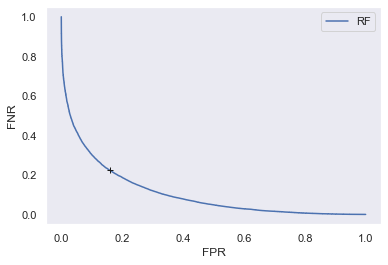

In [249]:
xgb = XGBClassifier(objective='binary:logistic',tree_method='hist' ,use_label_encoder=False, eval_metric = 'logloss',learning_rate = 0.1, max_depth = 5, n_estimators= 1000,reg_lambda =0.5 , reg_alpha = 35,gamma = 1)
xgb.fit(X_process, y_train)   
y_pred = xgb.predict(X_process_valid)
performance(y_valid, y_pred, xgb, X_process_valid)

### Entraînement du LightGBM

Confusion Matrix: 
 [[24470  5115]
 [ 6236 23626]]
Accuracy: 0.8090568069036285
False Positive Rate: 0.17289166807503803
False Negative Rate: 0.20882727211841137
FPR + FNR = 0.38171894019344943
1-(FPR + FNR) = 61.82810598065506


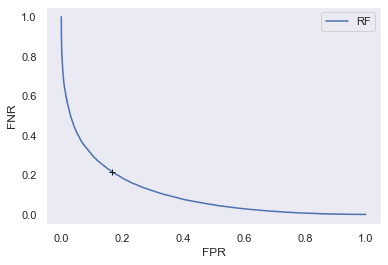

In [250]:
lgbm = lgb.LGBMClassifier(learning_rate = 0.1, max_depth = 5, n_estimators= 1000,reg_lambda =0.5 , reg_alpha = 35,subsample=0.96)
lgbm.fit(X_process, y_train)
y_pred = lgbm.predict(X_process_valid)
performance(y_valid, y_pred, lgbm, X_process_valid)

### Entraînement du CatBoost

Confusion Matrix: 
 [[24481  5104]
 [ 6211 23651]]
Accuracy: 0.8096623883459215
False Positive Rate: 0.17251985803616698
False Negative Rate: 0.20799008773692318
FPR + FNR = 0.38050994577309016
1-(FPR + FNR) = 61.94900542269098


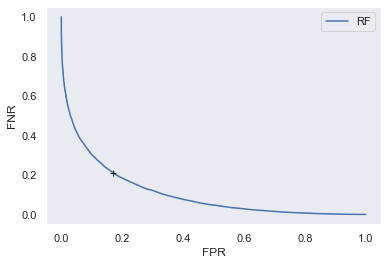

In [251]:
catboost_model = CatBoostClassifier(logging_level='Silent')
catboost_model.fit(X_process, y_train)
y_pred = catboost_model.predict(X_process_valid)
performance(y_valid, y_pred, catboost_model, X_process_valid)

### Entraînement du VotingClassifier

Confusion Matrix: 
 [[24500  5085]
 [ 6230 23632]]
Accuracy: 0.8096623883459215
False Positive Rate: 0.1718776406962988
False Negative Rate: 0.2086263478668542
FPR + FNR = 0.380503988563153
1-(FPR + FNR) = 61.94960114368471


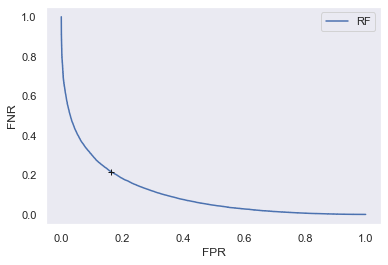

In [252]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lgb',lgbm),('xgb',xgb),('cat',catboost_model)], voting = 'soft') 
voting_clf.fit(X_process, y_train)
y_pred = voting_clf.predict(X_process_valid)
performance(y_valid, y_pred, voting_clf, X_process_valid)

# Preparation du X_test

In [253]:
X_test =  pd.DataFrame(np.load(r"../Data/Data_Challenge_02_2022/test_data.npy"))
X_test = pd.DataFrame(scaler.transform(X_test))
X_process_test = data_process(X_test,lda_Xtrain)
X_process_test.head()

(99080, 9)
(99080, 48)
(99080, 48)


,0,1,2,3,4,5,6,7,8,9,...,braycurtis,cityblock,chebyshev,correlation,euclidean,cosine,canberra,minkowski,sqeuclidean,lda
0,-0.012739,0.132201,-0.100726,-0.088624,0.015657,-0.735144,-1.016888,-0.205918,1.041424,-0.262556,...,0.538457,21.963309,2.606969,0.588274,5.241698,0.609593,22.001426,5.241698,27.475395,-0.147095
1,-0.709882,0.033947,0.033340,-0.088624,-2.800709,-1.267419,3.296080,0.626681,-0.961549,-0.258270,...,0.628556,38.563874,3.571293,0.662259,8.266288,0.626672,24.754447,8.266288,68.331510,-0.755162
2,0.464016,0.132201,-0.100726,-0.088624,-0.040627,-1.403777,-0.326397,1.456184,1.041424,-0.262556,...,0.488417,20.689832,2.185370,0.577851,5.189412,0.580555,19.568843,5.189412,26.929997,1.206194
3,-0.045632,-4.305588,-0.100726,6.669314,3.176014,-2.147525,-4.871496,1.154394,-0.961549,-0.236839,...,0.898148,66.368398,6.777874,0.984542,14.418176,1.010659,28.097471,14.418176,207.883796,0.101095
4,-1.374510,0.132201,-0.100726,-0.088624,-0.554126,-0.732513,0.035851,-0.732419,-0.961549,-0.258270,...,0.387300,21.252178,3.331201,0.497908,5.337680,0.407349,19.372094,5.337680,28.490824,-0.757791


# Submit

In [254]:
file_submission('test_final',voting_clf,X_process_test)